In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#giving col names to dataset

In [ ]:
cols="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""

columns=[]
for c in cols.split(','):
    if(c.strip()):
       columns.append(c.strip())

columns.append('target')
#print(columns)
print(len(columns))

42


In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/sample data.csv'
df=pd.read_csv(path,names=columns)

In [ ]:
#maintaining a dictionary that specifies every class label as specified type of attack in key-value type

In [ ]:
attacks_types = {
    'normal': 'normal',
'apache2':'dos',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'http_tunnel':'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'mailbomb':'dos',
'mscan':'probe',
'multihop': 'r2l',
'named':'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'ps':'u2r',
'portsweep': 'probe',
'processtable':'dos',
'rootkit': 'u2r',
'saint':'probe',
'satan': 'probe',
'sendmail':'r2l',
'snmpgetattack':'r2l',
'snmpguess':'r2l',
'smurf': 'dos',
'spy': 'r2l',
'sqlattack':'u2r',
'xterm':'u2r',
'xclock':'r2l',
'xsnoop':'r2l',
'udpstorm':'dos',
'worm':'dos',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}

In [ ]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune
125969,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune


In [ ]:
#adding a new col attack type to dataset which gives each type of class label as a type of attack

In [ ]:
df['Attack Type'] = df['target'].apply(lambda r: attacks_types.get(r, 'Unknown'))

# Print the updated DataFrame
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,dos
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,normal


In [ ]:
#count the no.of attacks for each type

In [ ]:
df['Attack Type'].value_counts()

normal    67343
dos       45927
probe     11656
r2l         995
u2r          52
Name: Attack Type, dtype: int64

In [ ]:
#Visualization
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

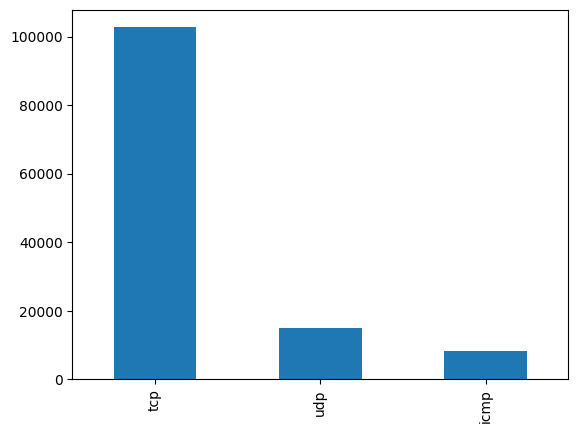

In [ ]:
bar_graph('protocol_type')

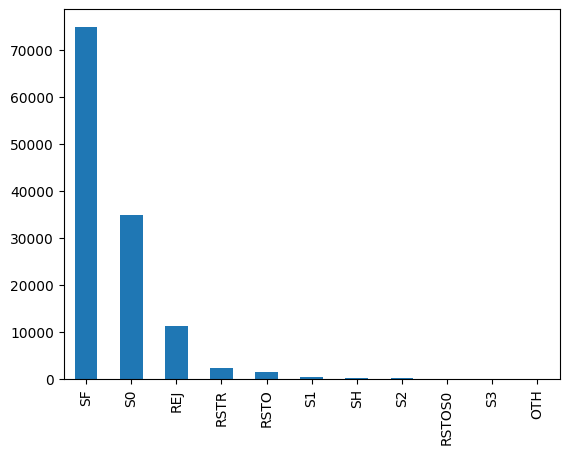

In [ ]:
bar_graph('flag')

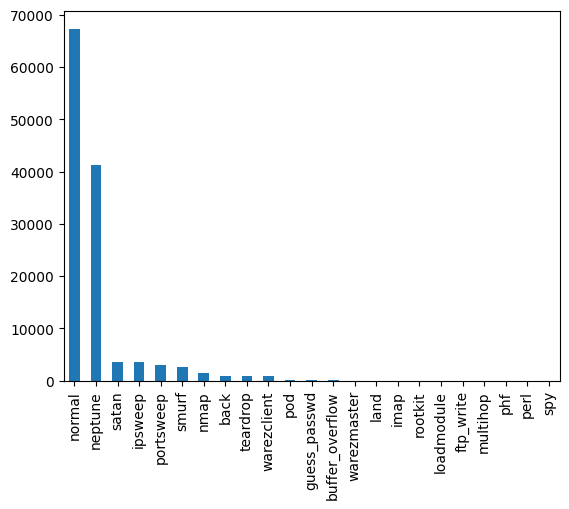

In [ ]:
bar_graph('target')

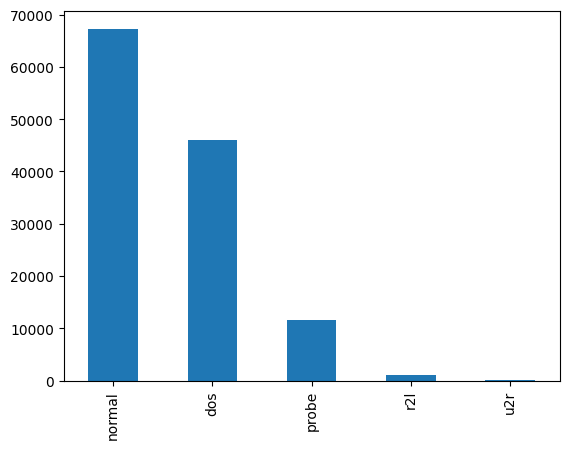

In [ ]:
bar_graph('Attack Type')

In [ ]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target', 'Attack Type'],
      dtype='object')

Heatmap : graphical rep of data in matrix form used to visualize the correlation or relationship between two or more variables in a dataset.
each cell of the matrix is filled with a color that represents the value of the corresponding data point.

<ipython-input-18-98bd1c7adef4>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')# drop columns with NaN
<ipython-input-18-98bd1c7adef4>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()#corr b/w all pairs of columns


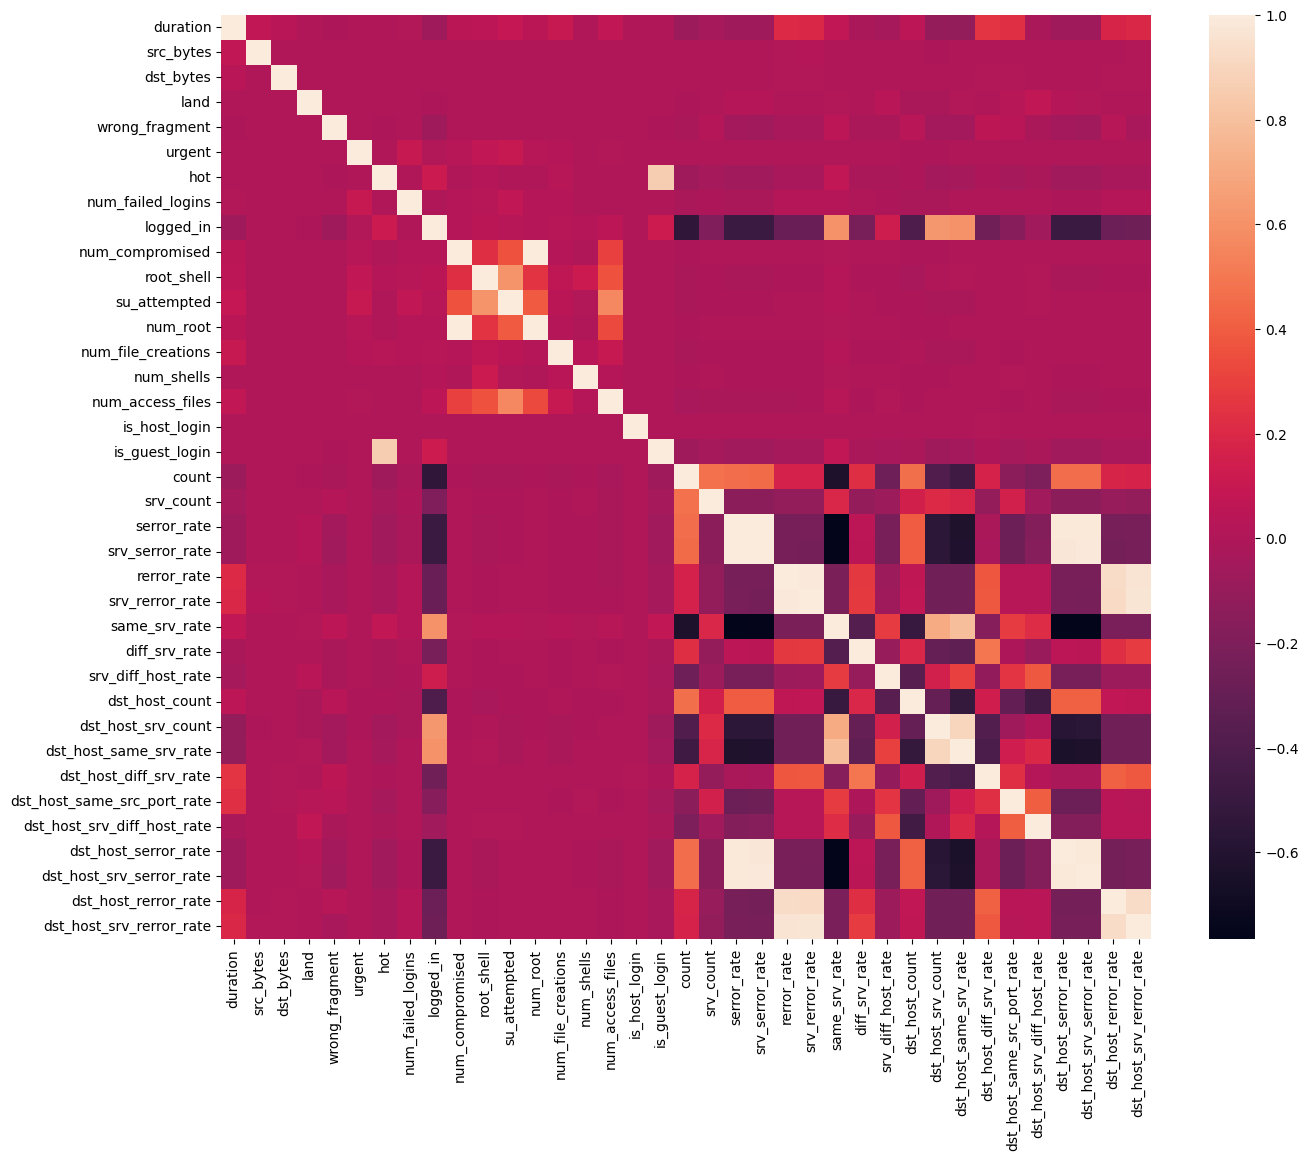

In [ ]:
df = df.dropna('columns')# drop columns with NaN
df = df[[col for col in df if df[col].nunique() > 1]]# keep columns where there are more than 1 unique values
corr = df.corr()#corr b/w all pairs of columns
plt.figure(figsize=(15,12))
sns.heatmap(corr)
plt.show()

In [ ]:
#along x-axis inplace-->change directly applied to data
#drop unnecessary attributes
df.drop('num_root',axis = 1,inplace = True)

df.drop('srv_serror_rate',axis = 1,inplace = True)

df.drop('srv_rerror_rate',axis = 1, inplace=True)

df.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)

df.drop('dst_host_serror_rate',axis = 1, inplace=True)

df.drop('dst_host_rerror_rate',axis = 1, inplace=True)

df.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)

df.drop('dst_host_same_srv_rate',axis = 1, inplace=True)

In [ ]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,1.00,0.00,0.00,150,25,0.03,0.17,0.00,normal,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,0.08,0.15,0.00,255,1,0.60,0.88,0.00,normal,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.07,0.00,255,26,0.05,0.00,0.00,neptune,dos
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.00,30,255,0.00,0.03,0.04,normal,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.09,255,255,0.00,0.00,0.00,normal,normal


In [ ]:
#protocol_type feature mapping
pmap = {'icmp':0,'tcp':1,'udp':2}
df['protocol_type'] = df['protocol_type'].map(pmap)

Text(0, 0.5, 'Count')

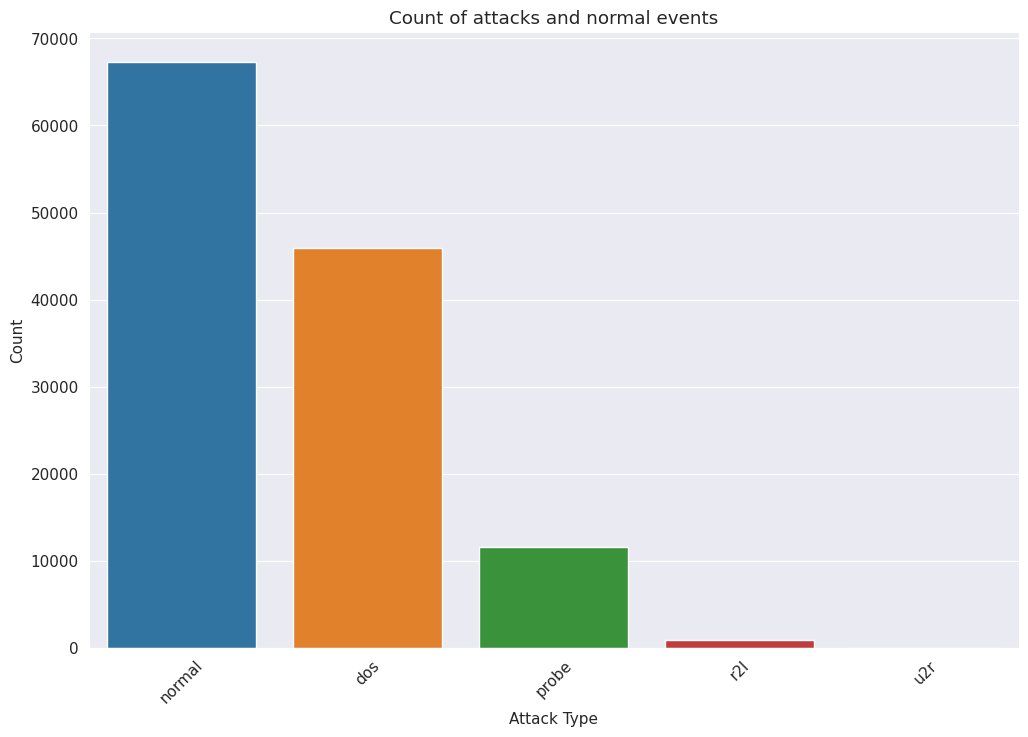

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
plt.rcParams["figure.figsize"] = (12,8)
font = {"size"   : 11}

plt.rc('font', **font)

grouped_labels = df.groupby("Attack Type")["Attack Type"].count().sort_values(ascending=False)
plt.xticks(rotation=45)

sns.barplot(x=grouped_labels.index, y=grouped_labels.values)
plt.title("Count of attacks and normal events")
plt.ylabel("Count")

In [ ]:
#flag feature mapping
fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
df['flag'] = df['flag'].map(fmap)

In [ ]:
#attack type feature mapping
amap = {'dos':0,'normal':1,'probe':2,'r2l':3,'u2r':4}
df['Attack Type'] = df['Attack Type'].map(amap)

In [ ]:
df.drop('service',axis = 1,inplace= True)

In [ ]:
#atlast the original dataset changed from 42 attributes to 33 cols by dropping the unnecessary cols

In [ ]:
df

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,1,0,491,0,0,0,0,0,0,...,1.00,0.00,0.00,150,25,0.03,0.17,0.00,normal,1
1,0,2,0,146,0,0,0,0,0,0,...,0.08,0.15,0.00,255,1,0.60,0.88,0.00,normal,1
2,0,1,1,0,0,0,0,0,0,0,...,0.05,0.07,0.00,255,26,0.05,0.00,0.00,neptune,0
3,0,1,0,232,8153,0,0,0,0,0,...,1.00,0.00,0.00,30,255,0.00,0.03,0.04,normal,1
4,0,1,0,199,420,0,0,0,0,0,...,1.00,0.00,0.09,255,255,0.00,0.00,0.00,normal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,1,1,0,0,0,0,0,0,0,...,0.14,0.06,0.00,255,25,0.06,0.00,0.00,neptune,0
125969,8,2,0,105,145,0,0,0,0,0,...,1.00,0.00,0.00,255,244,0.01,0.01,0.00,normal,1
125970,0,1,0,2231,384,0,0,0,0,0,...,1.00,0.00,0.00,255,30,0.06,0.00,0.00,normal,1
125971,0,1,1,0,0,0,0,0,0,0,...,0.06,0.05,0.00,255,8,0.05,0.00,0.00,neptune,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPool1D, Flatten, Dropout, LSTM, Activation

In [ ]:
df = df.drop(['target',], axis=1)
print(df.shape)

# Target variable and train set
Y = df[['Attack Type']]
X = df.drop(['Attack Type',], axis=1)

#scaling so that all features has consistent values
sc = MinMaxScaler()
X = sc.fit_transform(X)

(125973, 32)


In [ ]:
# Split test and train data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(100778, 31) (25195, 31)
(100778, 1) (25195, 1)


In [ ]:
#cnn
kernel_size = 5
filters = 64
pool_size = 4

In [ ]:
#training
batch_size = 30
epochs = 2

In [ ]:
# LSTM
lstm_output_size = 70

In [ ]:
# Training
batch_size = 30
epochs = 2

In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [ ]:
#reshaping train test based on indexes

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
Y_train = np.array(Y_train)

In [ ]:
model = Sequential()

In [ ]:
#conv1D-> used for 1-dimensional i.e., txt data; 32->filters of output channel 9->size of convolution window/kernel
#maxpool1D -> used for maxpooling, i.e., downsampling
#dropout-> used to drop the layers by 0.2 -- 20%
#padding same means output size should be equal to input no change in size
#activation func used is relu
#dense is used for classification of output

In [ ]:
#model compiled using loss func binary_crossentropy mostly used for binary classification
#optimizer is adam

In [ ]:
#output of cnn fed into lstm
#units specifies no.of units in a lstm
#retrun sequences refers to it will output a sequence for each input sequence if true
#flatten used to classify the output from lstm as binary classification


In [ ]:
num_classes = 5

In [ ]:
# CNN layers
model.add(Conv1D(32, 9, padding="same", input_shape=(X_train.shape[1], 1), activation='relu'))
model.add(MaxPool1D(pool_size=(2)))
model.add(Dropout(0.2))

model.add(Conv1D(32, 3, padding="same", activation='relu'))
model.add(MaxPool1D(pool_size=(4)))
model.add(Dropout(0.2))

# LSTM layers
model.add(LSTM(units=16, return_sequences=True, dropout=0.2))
model.add(LSTM(units=64, return_sequences=True))
model.add(LSTM(units=64, return_sequences=True))
model.add(LSTM(units=512, return_sequences=False, dropout=0.2))

# Output layer
model.add(Dense(units=num_classes))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 31, 32)            320       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 15, 32)           0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 15, 32)            3104      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 3, 32)            0         
 1D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 3, 32)             0

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=10, batch_size=250)

Epoch 1/10
404/404 [==============================] - 77s 171ms/step - loss: 0.4425 - accuracy: 0.8509
Epoch 2/10
404/404 [==============================] - 72s 177ms/step - loss: 0.1832 - accuracy: 0.9500
Epoch 3/10
404/404 [==============================] - 71s 175ms/step - loss: 0.1494 - accuracy: 0.9558
Epoch 4/10
404/404 [==============================] - 71s 176ms/step - loss: 0.1388 - accuracy: 0.9578
Epoch 5/10
404/404 [==============================] - 70s 174ms/step - loss: 0.1288 - accuracy: 0.9599
Epoch 6/10
404/404 [==============================] - 73s 181ms/step - loss: 0.1211 - accuracy: 0.9610
Epoch 7/10
404/404 [==============================] - 73s 180ms/step - loss: 0.1143 - accuracy: 0.9617
Epoch 8/10
404/404 [==============================] - 74s 184ms/step - loss: 0.1079 - accuracy: 0.9629
Epoch 9/10
404/404 [==============================] - 72s 178ms/step - loss: 0.0990 - accuracy: 0.9630
Epoch 10/10
404/404 [==============================] - 73s 182ms/step - l

In [ ]:
# 20% train data test
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
Y_test = np.array(Y_test)

In [ ]:
test_results = model.evaluate(X_test, Y_test, verbose=1)

788/788 [==============================] - 11s 12ms/step - loss: 0.0684 - accuracy: 0.9779


In [ ]:
print(test_results[1])

0.9778924584388733


In [ ]:
model.save_weights('model_weightss.h5')

In [ ]:
# Assuming you have already compiled the model and trained it

# Generate predictions on test data
predictions = model.predict(X_test)

# Convert the predictions to class labels
predicted_labels = [np.argmax(pred) for pred in predictions]

# Print the predicted labels
print(predicted_labels)


788/788 [==============================] - 11s 12ms/step
[1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 2, 1, 0, 1, 1, 2, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 0, 2, 1, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 0, 1, 0, 2, 1, 1, 1, 1, 0, 0, 0, 1, 0, 2, 1, 1, 0, 0, 1, 0, 0, 2, 1, 1, 0, 1, 1, 0, 2, 1, 1, 0, 1, 1, 1, 0, 0, 2, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 2, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 2, 1, 0, 1, 0, 1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 1, 1, 0, 2, 2, 1, 1, 2, 1, 0, 1, 2, 2, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 2, 2, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 0, 1, 1, 2, 1, 2, 0, 2, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 

In [ ]:
from sklearn.metrics import classification_report, accuracy_score


# Generate classification report
report = classification_report(Y_test, predicted_labels)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      9181
           1       0.97      0.99      0.98     13422
           2       0.94      0.95      0.95      2357
           3       0.67      0.04      0.08       224
           4       0.00      0.00      0.00        11

    accuracy                           0.98     25195
   macro avg       0.71      0.60      0.60     25195
weighted avg       0.97      0.98      0.97     25195



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Calculate precision
precision = precision_score(Y_test, predicted_labels, average='weighted')

# Calculate recall
recall = recall_score(Y_test, predicted_labels, average='weighted')

# Calculate F1 score
f1 = f1_score(Y_test,  predicted_labels, average='weighted')

# Calculate accuracy
accuracy = accuracy_score(Y_test, predicted_labels)

# Print the metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)


Precision: 0.9749430385205698
Recall: 0.9778924389759873
F1 Score: 0.9739768444634074
Accuracy: 0.9778924389759873


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import numpy as np

def preprocess_data(data):
    # Define the unique protocols
    unique_protocols = ['tcp', 'udp']  # Add all unique protocols from your dataset

    # Convert protocol
    protocol_idx = unique_protocols.index(data[0][1])
    data[0][1] = protocol_idx

    return data

# Generate predictions
sample_data = [[0, 'tcp', 'private', 'S0', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 117, 16, 1, 1, 0, 0, 0.14, 0.06, 0, 255, 15, 0.06, 0.07, 0, 0, 1, 1, 0, 0]]
preprocessed_sample_data = preprocess_data(sample_data)
prediction = model.predict(np.array(preprocessed_sample_data))
predicted_class = np.argmax(prediction)

# Define the attack types
attack_types = ['normal', 'attack_type_1', 'attack_type_2']  # Add all attack types

# Get the predicted attack type
predicted_attack_type = attack_types[predicted_class]

print("Predicted Attack Type:", predicted_attack_type)
